<a href="https://colab.research.google.com/github/gantir/eva4/blob/develop/s13/1/s13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np

In [2]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive/')
except:
  print('May be not using Google Colab')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks/EVA4/data/yolo_object_detection')


In [0]:
# Download the pre trained model weights based on this pysource article: https://pysource.com/2019/06/27/yolo-object-detection-using-opencv-with-python/
# !wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
# Loading Image
img = cv2.imread("lap.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [0]:
# Detectiing Objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [8]:
class_ids = []
confidences = []
boxes = []

for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      #Rectangle Co-ordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)

      boxes.append([x, y , w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

print(class_ids, boxes, confidences)

[0, 63] [[-13, 151, 1172, 1584], [461, 1152, 1291, 560]] [0.9895727038383484, 0.9905701279640198]


[[1]
 [0]]


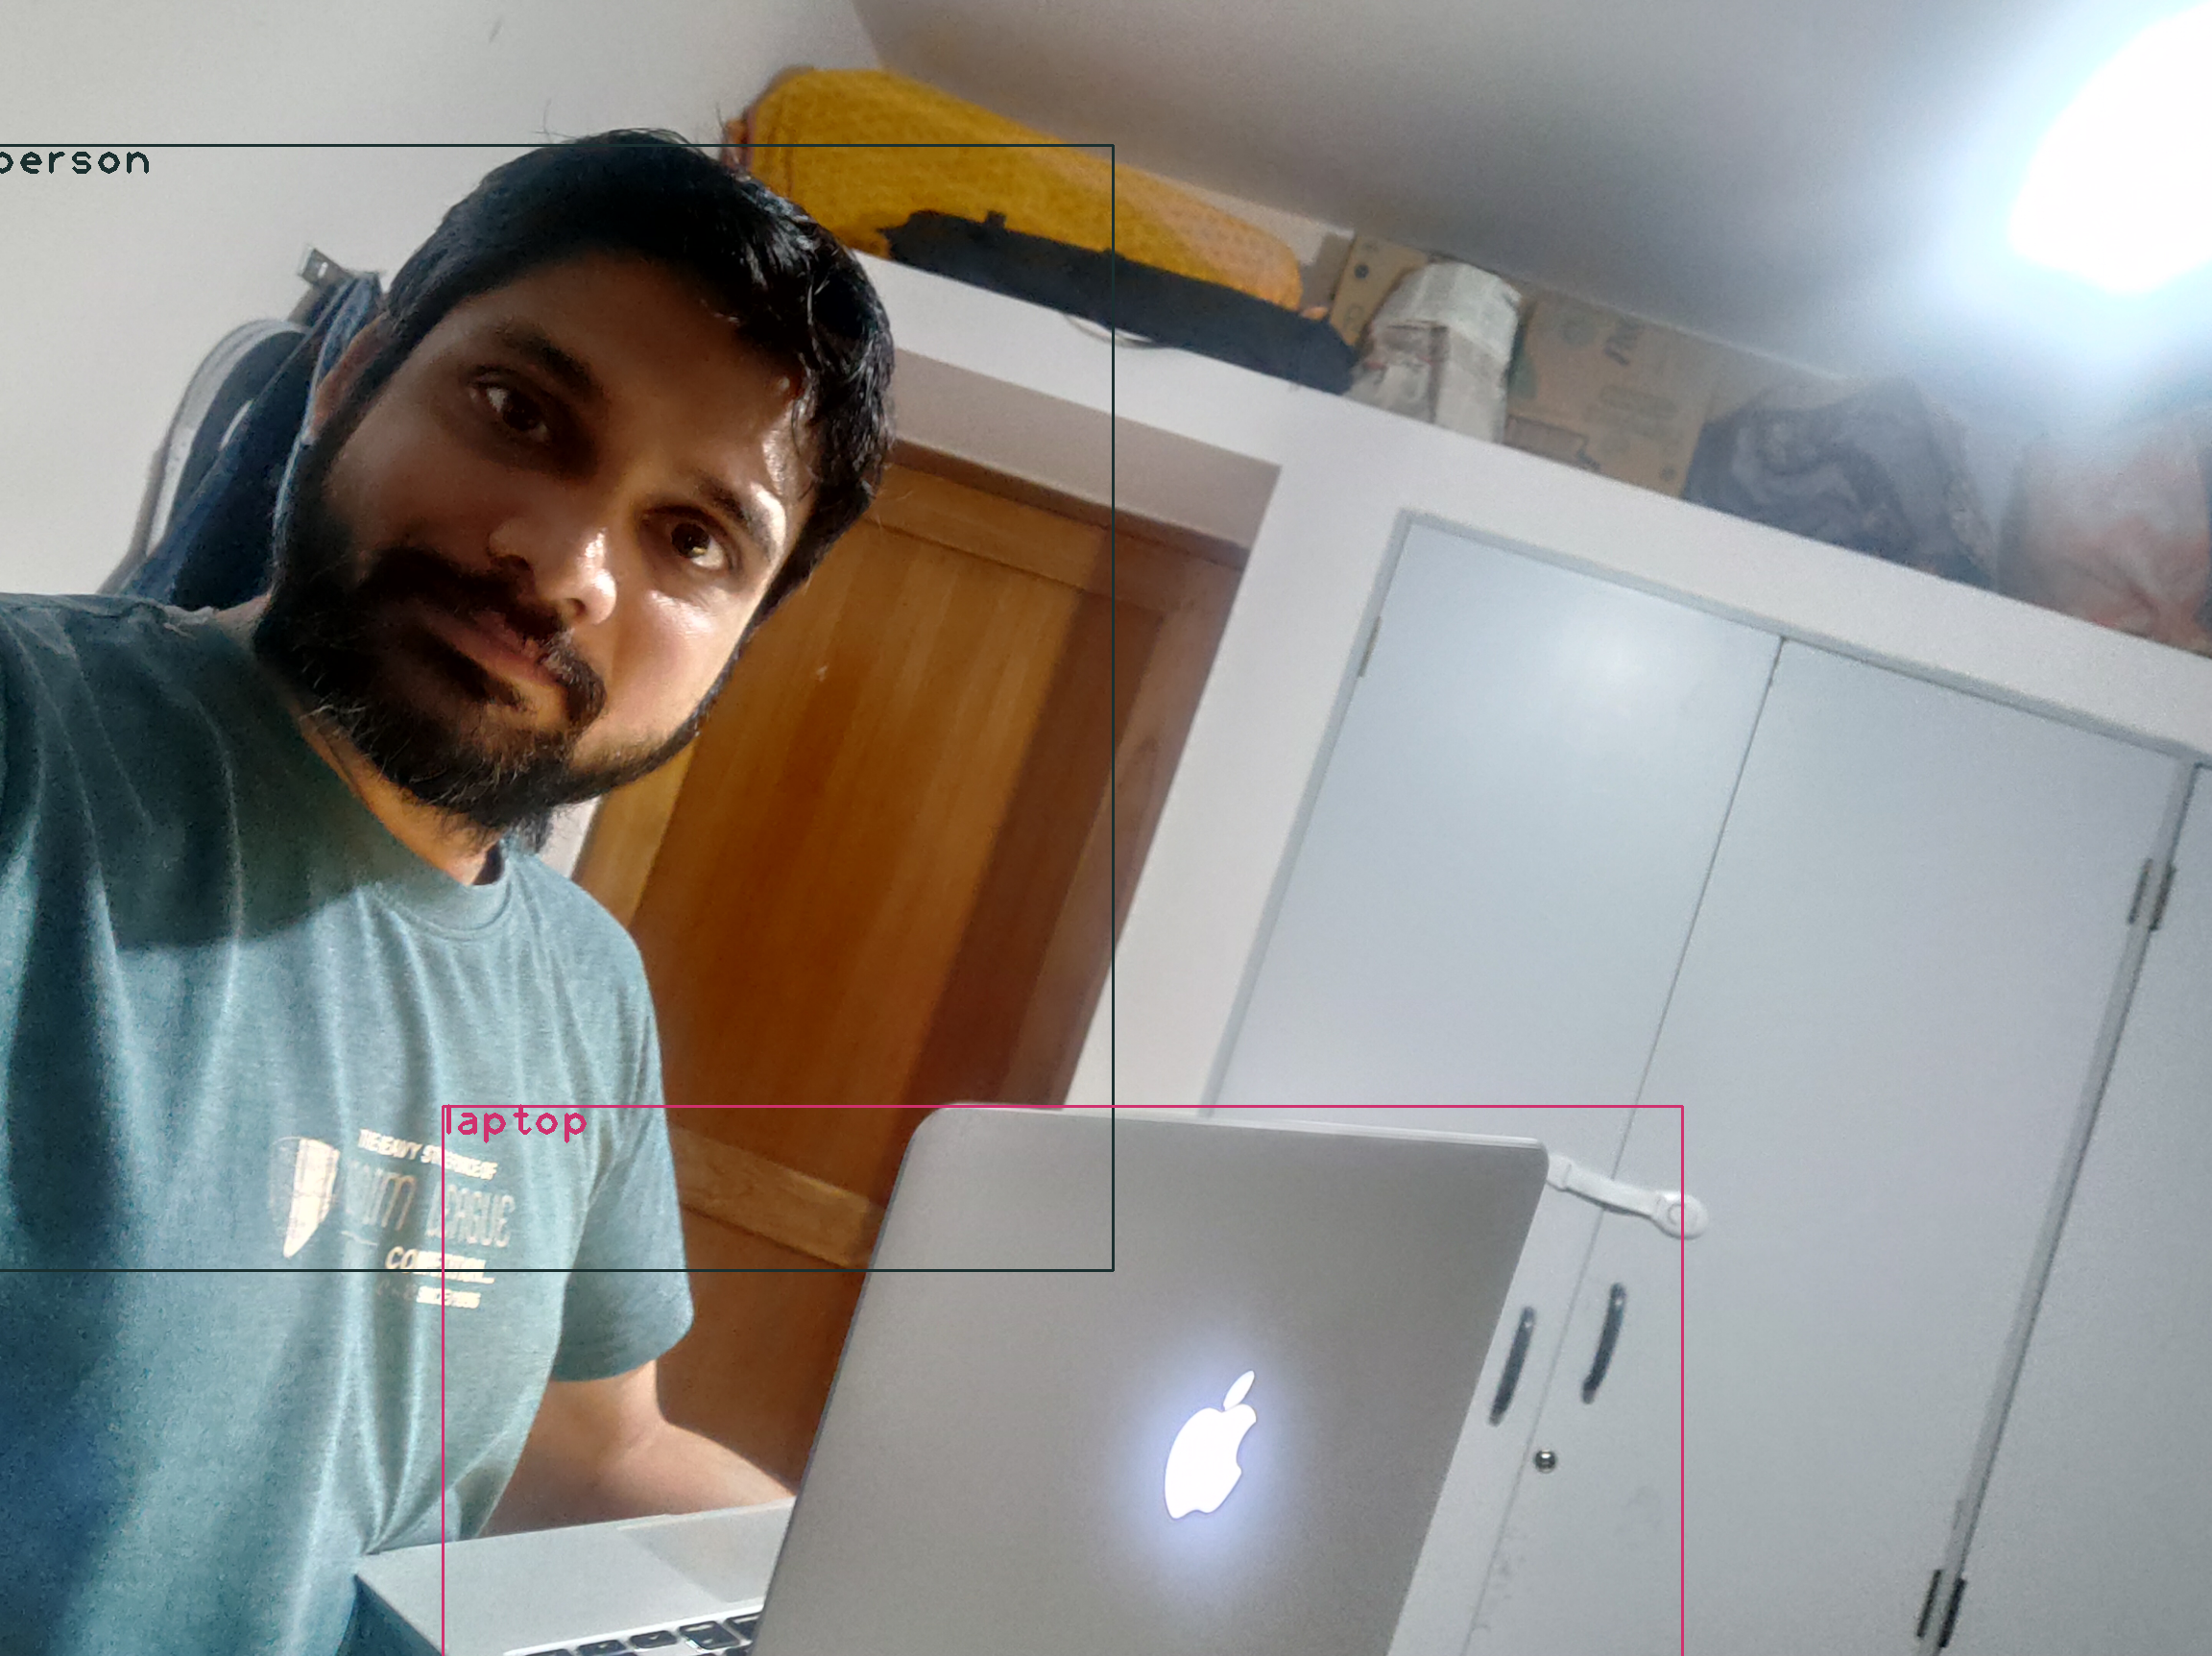

In [9]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w, y+w), color, 2)
    cv2.putText(img, label, (x, y+30), font, 3, color, 3 )

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()